In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
# load data
diabetes = datasets.load_diabetes()
print(diabetes.data)
print(diabetes.data.shape)
print(diabetes.feature_names)
diabetes.feature_names = np.array(diabetes.feature_names)
#print(diabetes.feature_names.shape)
print(diabetes.target)
print(diabetes.target.shape)


[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
(442, 10)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 14

In [3]:
# data processing
diabetesDict={}
for i in range(10):
    diabetesDict[diabetes.feature_names[i]] = diabetes.data[:,i]

diabetes_pd = pd.DataFrame(diabetesDict)
diabetes_pd.insert(10,'Target',diabetes.target)
diabetes_pd

,age,bmi,bp,s1,s2,s3,s4,s5,s6,sex,Target
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,0.050680,151.0
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,-0.044642,75.0
2,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,0.050680,141.0
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,-0.044642,206.0
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,-0.044642,135.0
5,-0.092695,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,-0.044642,97.0
6,-0.045472,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,0.050680,138.0
7,0.063504,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,0.050680,63.0
8,0.041708,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,0.050680,110.0
9,-0.070900,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,-0.044642,310.0


In [4]:
# split training data and test data
trainSet, testSet = train_test_split(diabetes_pd, test_size=0.33)
print(trainSet.shape)
print(testSet.shape)

(296, 11)
(146, 11)


In [5]:
trainData = pd.DataFrame.as_matrix(trainSet[diabetes.feature_names])
print(trainData.shape)
trainTarget = pd.DataFrame.as_matrix(trainSet['Target'])
print(trainTarget.shape)

(296, 10)
(296,)


In [6]:
testData = pd.DataFrame.as_matrix(testSet[diabetes.feature_names])
testTarget = pd.DataFrame.as_matrix(testSet['Target'])

In [7]:
# model
regr = linear_model.LinearRegression()

In [8]:
# train
regr.fit(trainData, trainTarget)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
#predict
y_pred = regr.predict(testData)

In [10]:
# loss
loss = mean_squared_error(testTarget, y_pred)
print("Loss:",loss)

Loss: 2921.2348518955405


In [11]:
r2score = r2_score(testTarget, y_pred)
print("R2 score:", r2score)

R2 score: 0.485375160188389


example code from sklearn

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


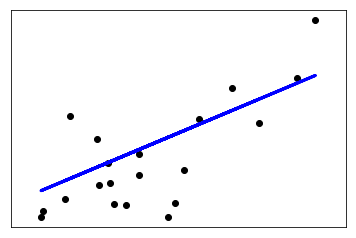

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()